# Q.1-10

In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

## Q.1. チャネル入れ替え
題意としてはRGBをBGRの並びにとのことなのだがOpenCVの場合cv2.imreadをした時点でBGRになっている

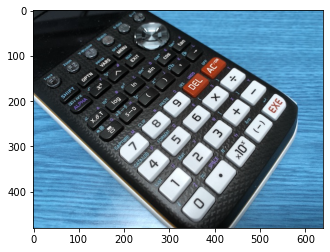

In [2]:
cimg = cv2.imread('Calc.jpg')
plt.imshow(cimg)

敢えて入れ替えをしたいなら画像のコピーを作って，上書きする形でチャネルを入れ換える

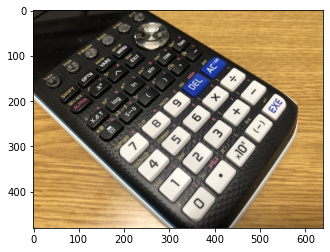

In [3]:
dst = cimg.copy()
dst[:, :, 0] = cimg[ :, :, 2]
dst[:, :, 2] = cimg[ :, :, 0]
plt.imshow(dst)

## Q.2. グレースケール化
OpenCVでは画像を読む際にカラーの指定(4チャネル以上の場合も含め)がオプションで可能。cv2.imreadの第2引数にcv2.IMREAD_ に続くオプションを選ぶ。

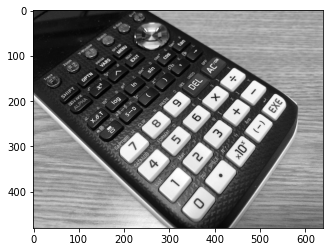

In [4]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(gimg, cmap='gray')

## Q.3. 二値化
OpenCVでの二値化もあるがnumpyの機能で十分。cv2の画像データはnumpyのndarrayなので，インデックスのところで条件式を入れるとTrueになる画素へ値を代入できる。

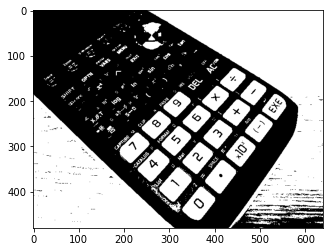

In [5]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
bimg = gimg.copy()
bimg[gimg<128] = 0
bimg[gimg >= 128] = 255
plt.imshow(bimg, cmap='gray')

## Q.4. 大津の二値化
大津の法はOpenCVだとcv2.threshでcv2.THRESH_OTSUを指定すれば良い。

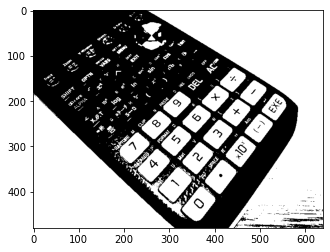

In [7]:
gimg = cv2.imread('Calc.jpg', cv2.IMREAD_GRAYSCALE)
ret, bimg = cv2.threshold(gimg, 0, 255, cv2.THRESH_OTSU)
plt.imshow(bimg, cmap='gray')

## Q.5. HSV変換
cv2.cvtColorで色変換したうえで，Hueを補数にする。ただし8bit画像だとHueは2で割られていて，180が最大。

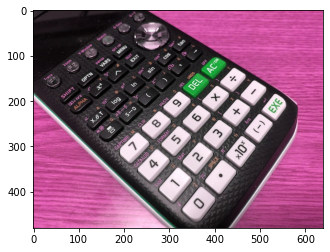

In [8]:
cimg = cv2.imread('Calc.jpg')
hsvimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2HSV)
hsvimg[:, :, 0] = 180 - hsvimg[:, :, 0]
dst = cv2.cvtColor(hsvimg, cv2.COLOR_HSV2BGR)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## Q.6. 減色処理
8bitを32, 96, 160, 224の4値に減色なのだが，64で整数として除算して1を加えて32を乗ずるだけだったりする

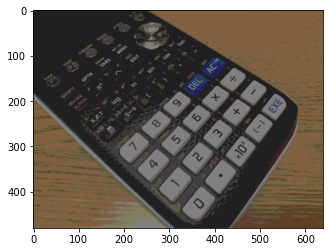

In [9]:
import numpy as np
cimg = cv2.imread('Calc.jpg')
cimg = (cimg/64).astype(np.uint8) + 1
cimg = cimg*32
plt.imshow(cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB))


## Q.7. 平均プーリング
出力画像のサイズを変えていないので，モザイク処理の代表値を平均値にしている感じ。
scikit-image(skimage)のblock_reduceを使うのだが，3x3だとCalcがデカくてわからない。ので
画像のサイズを小さくしてから処理する

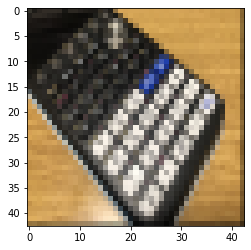

In [10]:
import numpy as np
from skimage.measure import block_reduce
cimg = cv2.imread('Calc.jpg')
cimg = cv2.resize(cimg, (128,128))
dst = block_reduce(cimg, (3, 3,1), np.average).astype(np.uint8)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## Q.8. Maxプーリング
Q7と同じで関数をmaxに変える

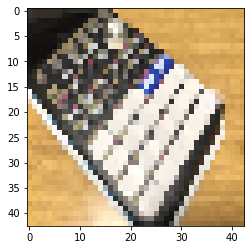

In [11]:
import numpy as np
from skimage.measure import block_reduce
cimg = cv2.imread('Calc.jpg')
cimg = cv2.resize(cimg, (128,128))
h, w, c = cimg.shape
h = int(h/3)
w = int(w/3)
dst = block_reduce(cimg, (3, 3,1), np.max).astype(np.uint8)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## Q.9. ガウシアンフィルタ
OpenCVにGaussianBlurとして実装されている。マニュアルにはgetGaussianKernelでフィルタを作れるよとだけ書いてあるが，実際に生成されるのは1DのGaussian Filterなので2Dフィルタを作る必要がある。

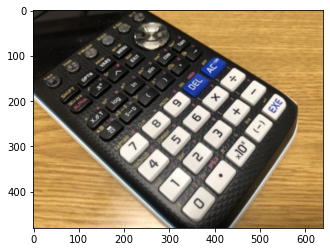

In [12]:
cimg = cv2.imread('Calc.jpg')
dst = cv2.GaussianBlur(cimg, (3,3), 1)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

getGaussianKernelで1Dフィルタを生成してから2Dフィルタを生成し，filter2Dでフィルタ処理。(わかりやすくするために15x15のフィルタにしている。

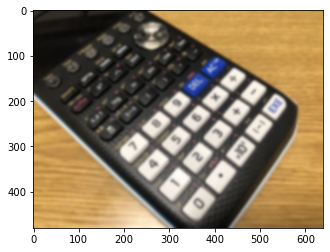

In [13]:
import numpy as np
cimg = cv2.imread('Calc.jpg')
kern = cv2.getGaussianKernel(15,-1)
kern2 = np.dot(kern, kern.T)
dst2 = cv2.filter2D(cimg, -1, kern2)
plt.imshow(cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB))

## Q.10. メディアンフィルタ
medianBlurを使う。第二引数がフィルタサイズ。ここでは分かりやすくするために15x15にしている。

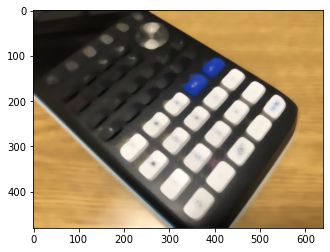

In [14]:
cimg = cv2.imread('Calc.jpg')
dst = cv2.medianBlur(cimg, 15)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))